In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/recipes.csv')

In [3]:
df_reviews = pd.read_csv('data/reviews.csv')

In [4]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [5]:
df['AggregatedRating']

0         4.5
1         3.0
2         4.5
3         4.5
4         4.5
         ... 
522512    NaN
522513    NaN
522514    NaN
522515    NaN
522516    NaN
Name: AggregatedRating, Length: 522517, dtype: float64

In [6]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [7]:
df['Images'].iloc[0]

'c("https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/YUeirxMLQaeE1h3v3qnM_229%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/AFPDDHATWzQ0b1CDpDAT_255%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/UYgf9nwMT2SGGJCuzILO_228%20berry%20blue%20frzn%20dess.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/PeBMJN2TGSaYks2759BA_20140722_202142.jpg", \n"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/picuaETeN.jpg", "https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/38/pictzvxW5.jpg")'

In [4]:
df_reviews.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

In [5]:
df_reviews['RecipeId'].value_counts()

RecipeId
45809     2892
2886      2182
27208     1614
89204     1584
39087     1491
          ... 
98686        1
527293       1
385740       1
379694       1
398159       1
Name: count, Length: 271678, dtype: int64

# Preprocessing steps

Fazendo a junção dos dois dataframes - não sei ao certo

Ajeitando colunas do R e criando Coluna com número de ingredientes

In [6]:
def parse_r_c_list(value):
    if isinstance(value, str) and value.strip().startswith('c('):
        # Remove o "c(" no início e ")" no final
        value = value.strip()[2:-1]
        # Usa regex para extrair os itens entre aspas
        items = re.findall(r'"(.*?)"', value, re.DOTALL)
        return items
    return value  # se já for lista ou nulo

# Aplica a função para ajustar as colunas desejadas
cols_to_convert = ['Images','Keywords','RecipeIngredientQuantities','RecipeIngredientParts', 'RecipeInstructions']
for col in cols_to_convert:
    df[col] = df[col].apply(parse_r_c_list)

# Cria a coluna com o número de ingredientes
df['NumIngredients'] = df['RecipeIngredientParts'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Visualização rápida de como ficou
print(df[['RecipeIngredientParts', 'NumIngredients']].head())

                               RecipeIngredientParts  NumIngredients
0  [blueberries, granulated sugar, vanilla yogurt...               4
1  [saffron, milk, hot green chili peppers, onion...              25
2  [sugar, lemons, rind of, lemon, zest of, fresh...               5
3  [extra firm tofu, eggplant, zucchini, mushroom...              14
4  [plain tomato juice, cabbage, onion, carrots, ...               5


In [10]:
df['RecipeIngredientParts'].iloc[0][0]

'blueberries'

Filtrar dados

In [11]:
# Lista das colunas nutricionais a analisar
nutritional_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent'
]

# Garante que as colunas estão em formato numérico (caso venham como strings)
for col in nutritional_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cria uma máscara booleana com True para valores *não* outliers
mask = pd.Series(True, index=df.index)

# Para cada coluna, calcula os limites de outlier e atualiza a máscara
for col in nutritional_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifica outliers nessa coluna
    non_outliers = (df[col] >= lower_bound) & (df[col] <= upper_bound)
    
    # Atualiza a máscara com lógica AND inversa para remover qualquer outlier em qualquer coluna
    mask &= non_outliers

# Aplica o filtro
df_filtered = df[mask].reset_index(drop=True)

# Mostra quantos foram removidos
print(f"Total de receitas antes: {len(df)}")
print(f"Total de receitas após remoção de outliers: {len(df_filtered)}")

# Opcional: mostrar o describe novamente após filtragem
print(df_filtered[nutritional_cols].describe())

Total de receitas antes: 522517
Total de receitas após remoção de outliers: 386317
           Calories     FatContent  SaturatedFatContent  CholesterolContent  \
count  386317.00000  386317.000000        386317.000000       386317.000000   
mean      276.86218      13.738028             5.249407           51.114238   
std       176.34327      11.738181             5.200135           56.220867   
min         0.00000       0.000000             0.000000            0.000000   
25%       140.90000       4.600000             1.200000            2.600000   
50%       247.00000      10.800000             3.600000           31.900000   
75%       383.10000      20.000000             7.800000           80.600000   
max      1060.20000      60.000000            24.700000          264.000000   

       SodiumContent  CarbohydrateContent   FiberContent   SugarContent  \
count  386317.000000        386317.000000  386317.000000  386317.000000   
mean      402.998425            26.264231       2.42475

Acho que esse da data n precisa, basta fazer o dos null mesmo

In [12]:
def parse_duration(duration):
    if pd.isna(duration):
        return 0
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)
    if not match:
        return 0
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours + minutes / 60

In [ ]:
for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df[col + '_hours'] = df[col].apply(parse_duration)

df[['CookTime', 'PrepTime', 'TotalTime', 'CookTime_hours', 'PrepTime_hours', 'TotalTime_hours']].head()
df['CookTime'].fillna(0, inplace = True)

,CookTime,PrepTime,TotalTime,CookTime_hours,PrepTime_hours,TotalTime_hours
0,PT24H,PT45M,PT24H45M,24.000000,0.750000,24.750000
1,PT25M,PT4H,PT4H25M,0.416667,4.000000,4.416667
2,PT5M,PT30M,PT35M,0.083333,0.500000,0.583333
3,PT20M,PT24H,PT24H20M,0.333333,24.000000,24.333333
4,PT30M,PT20M,PT50M,0.500000,0.333333,0.833333


Onde cook time é nan, devemos preencher com 0!

In [11]:
df['DatePublished_format'] = pd.to_datetime(df['DatePublished'])
df['DatePublished_format'].head()

0   1999-08-09 21:46:00+00:00
1   1999-08-29 13:12:00+00:00
2   1999-09-05 19:52:00+00:00
3   1999-09-03 14:54:00+00:00
4   1999-09-19 06:19:00+00:00
Name: DatePublished_format, dtype: datetime64[ns, UTC]

# Visualization / insights

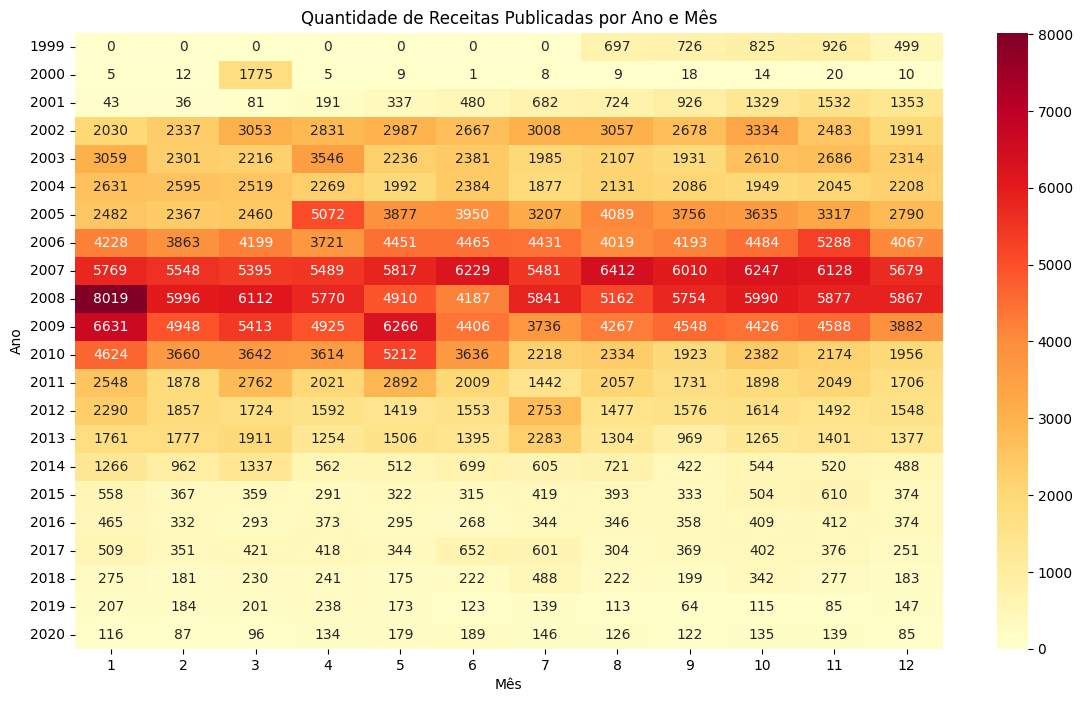

In [42]:
# Agrupa por ano e mês e conta as receitas
df['year'] = df['DatePublished_format'].dt.year
df['month'] = df['DatePublished_format'].dt.month

recipes_by_year_month = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(recipes_by_year_month, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Quantidade de Receitas Publicadas por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

In [65]:
df['RecipeCategory'].unique()   

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Pie', 'Chicken', 'Dessert', 'Southwestern U.S.',
       'Sauces', 'Stew', 'Black Beans', '< 60 Mins', 'Lactose Free',
       'Weeknight', 'Yeast Breads', 'Whole Chicken', 'High Protein',
       'Cheesecake', 'Free Of...', 'High In...', 'Brazilian', 'Breakfast',
       'Breads', 'Bar Cookie', 'Brown Rice', 'Oranges', 'Pork',
       'Low Protein', 'Asian', 'Potato', 'Cheese', 'Halibut', 'Meat',
       'Lamb/Sheep', 'Very Low Carbs', 'Spaghetti', 'Scones',
       'Drop Cookies', 'Lunch/Snacks', 'Beans', 'Punch Beverage',
       'Pineapple', 'Low Cholesterol', '< 30 Mins', 'Quick Breads',
       'Sourdough Breads', 'Curries', 'Chicken Livers', 'Coconut',
       'Savory Pies', 'Poultry', 'Steak', 'Healthy', 'Lobster', 'Rice',
       'Apple', 'Broil/Grill', 'Spreads', 'Crab', 'Jellies', 'Pears',
       'Chowders', 'Cauliflower', 'Candy', 'Chutneys', 'White Rice',
       'Tex Mex', 'Bass', 'German', 'Fru

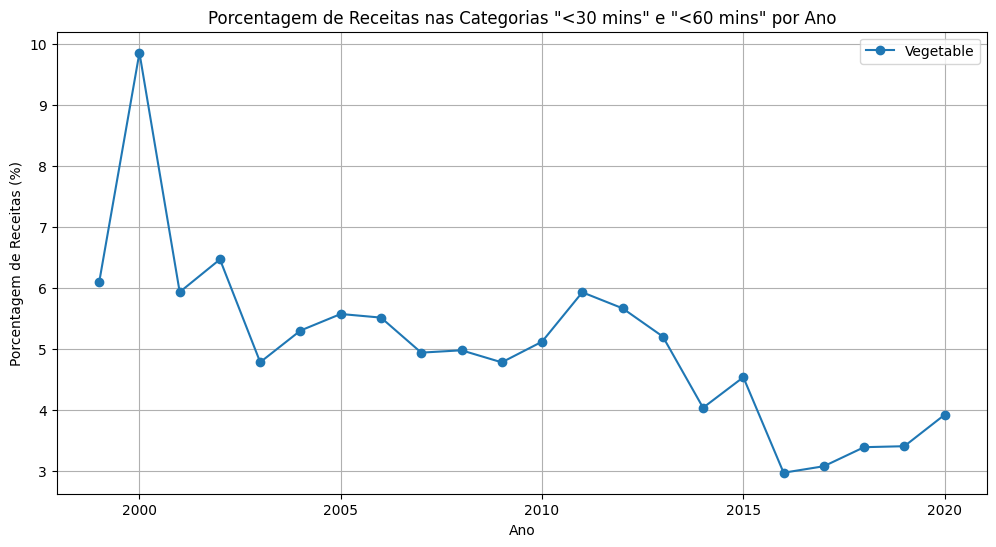

In [66]:
# Lineplot com a porcentagem de receitas nas categorias "<30 mins" e "<60 mins" por ano

df['year'] = df['DatePublished_format'].dt.year

# Filtra apenas as categorias desejadas
cat_filter = ['Vegetable']
df_filtered = df[df['RecipeCategory'].isin(cat_filter)]

# Conta o total de receitas por ano
total_per_year = df.groupby('year').size().rename('total').reset_index()

# Conta o total de cada categoria por ano
cat_counts = df_filtered.groupby(['year', 'RecipeCategory']).size().reset_index(name='count')

# Junta com o total de receitas por ano
cat_counts = cat_counts.merge(total_per_year, on='year')
cat_counts['percent'] = cat_counts['count'] / cat_counts['total'] * 100

# Pivot para facilitar o plot
pivot = cat_counts.pivot(index='year', columns='RecipeCategory', values='percent')

# Plot
plt.figure(figsize=(12,6))
for cat in cat_filter:
    if cat in pivot.columns:
        plt.plot(pivot.index, pivot[cat], marker='o', label=cat)
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Receitas (%)')
plt.title('Porcentagem de Receitas nas Categorias "<30 mins" e "<60 mins" por Ano')
plt.legend()
plt.grid(True)
plt.show()

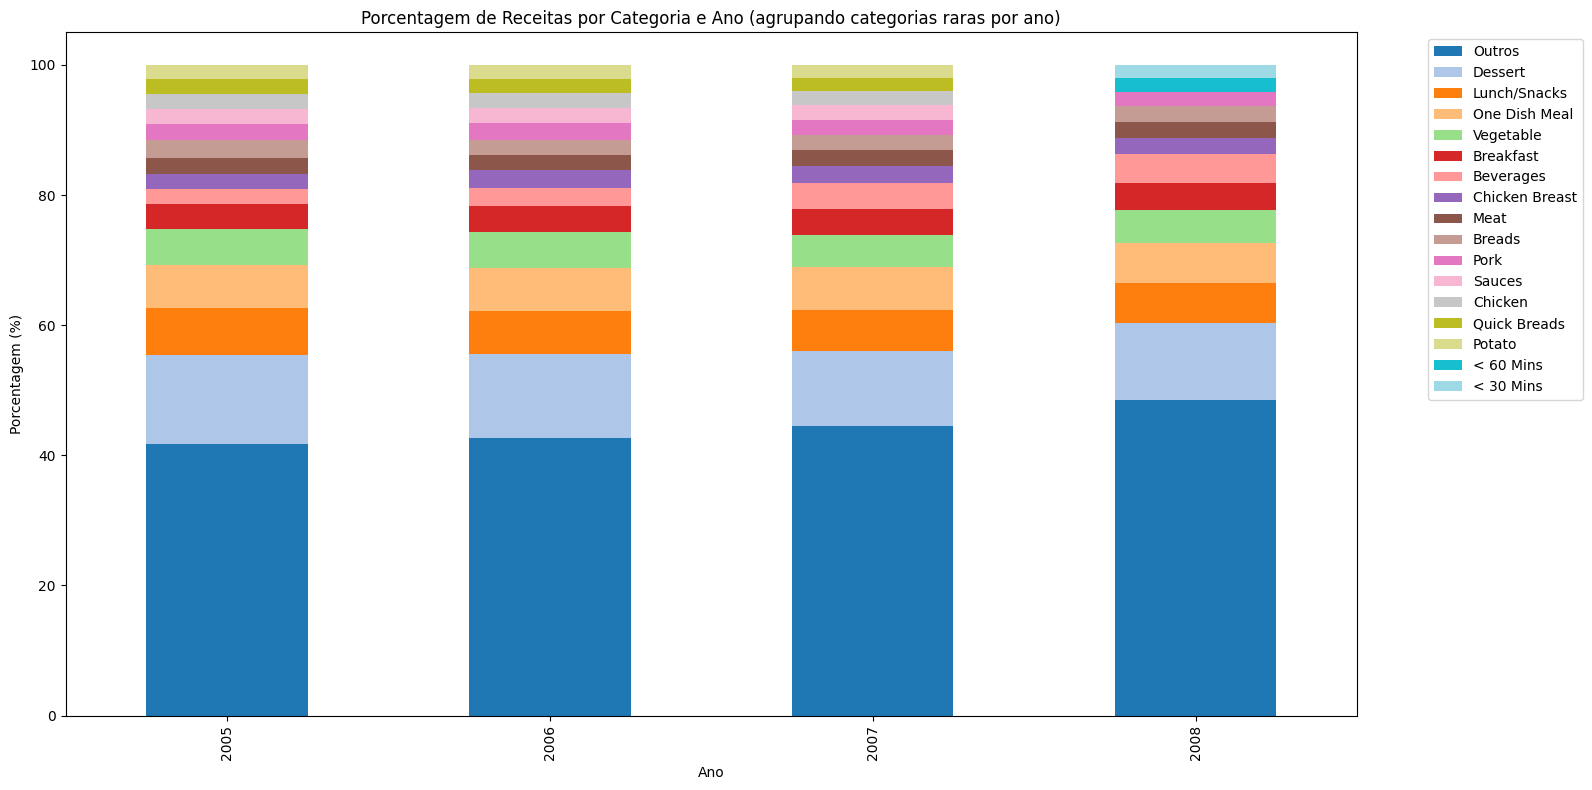

In [59]:
# Calcula a porcentagem de cada RecipeCategory por ano, agrupando categorias raras por ano

df['year'] = df['DatePublished_format'].dt.year

# Calcula a frequência de cada categoria por ano
cat_year = df.groupby(['year', 'RecipeCategory']).size().reset_index(name='count')

cat_year = cat_year[(cat_year['year'] >= 2005) & (cat_year['year'] <= 2008)]


# Calcula o total de receitas por ano
total_per_year = cat_year.groupby('year')['count'].transform('sum')
cat_year['percent'] = cat_year['count'] / total_per_year * 100

# Define o threshold (ex: 2%)
threshold = 2

# Para cada ano, marca categorias abaixo do threshold como 'Outros'
def group_rare(row, df_):
    year = row['year']
    percent = row['percent']
    if percent < threshold:
        return 'Outros'
    return row['RecipeCategory']

cat_year['RecipeCategory_grouped'] = cat_year.apply(lambda row: group_rare(row, cat_year), axis=1)

# Soma novamente as porcentagens após agrupar "Outros"
cat_year_grouped = cat_year.groupby(['year', 'RecipeCategory_grouped'])['percent'].sum().reset_index()

# Pivot para barras empilhadas
pivot = cat_year_grouped.pivot(index='year', columns='RecipeCategory_grouped', values='percent').fillna(0)

# Ordena as colunas por frequência média (opcional)
pivot = pivot[pivot.mean().sort_values(ascending=False).index]

# Plot
pivot.plot(kind='bar', stacked=True, figsize=(16,8), colormap='tab20')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Ano')
plt.title('Porcentagem de Receitas por Categoria e Ano (agrupando categorias raras por ano)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

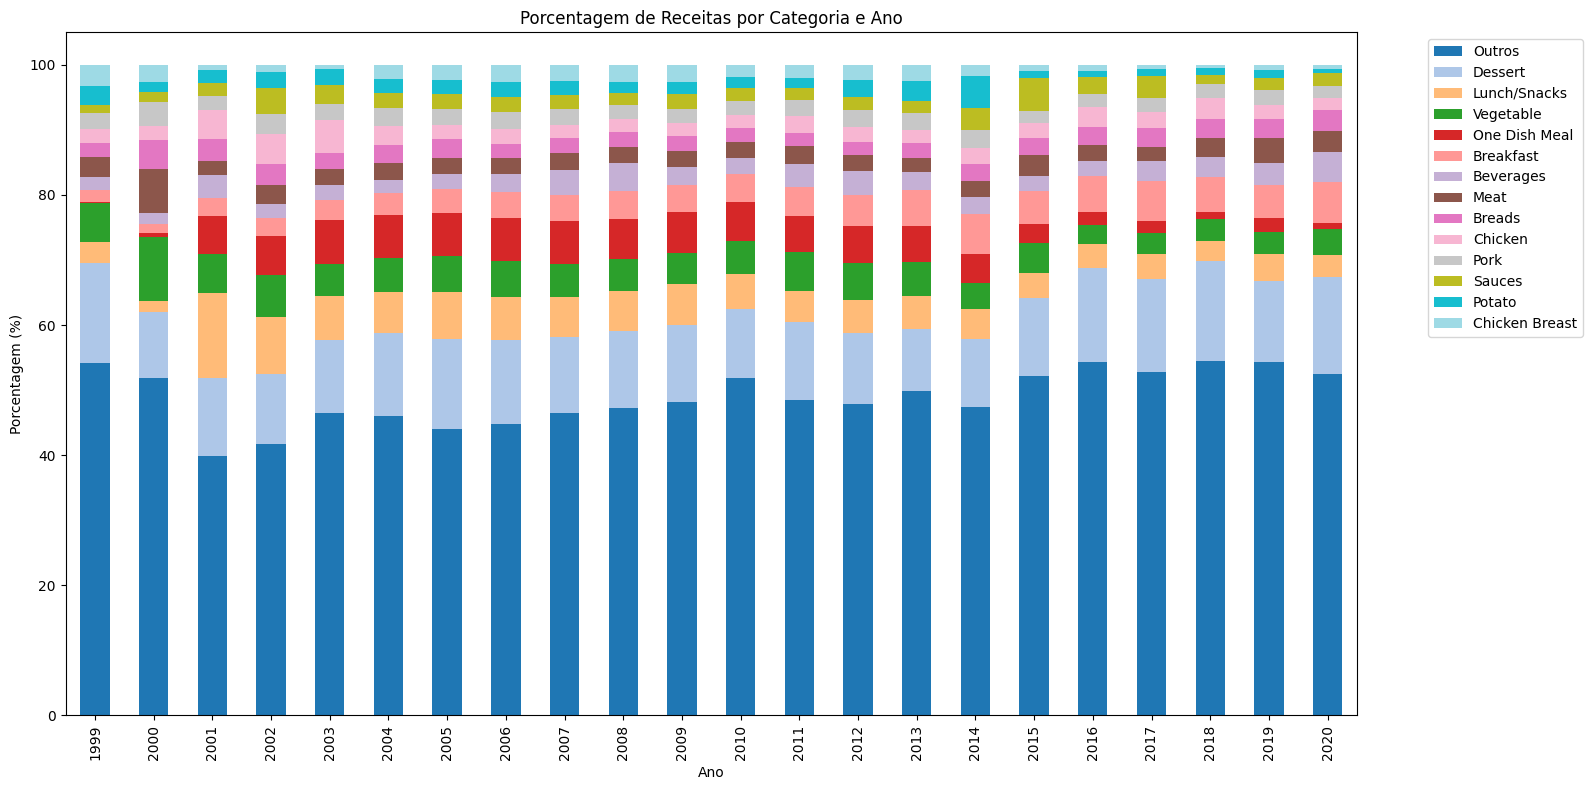

In [57]:
# Barras empilhadas: porcentagem de cada RecipeCategory por ano

# Define o threshold mínimo de frequência para manter a categoria (ex: 2%)
threshold = 0.02

# Conta a frequência total de cada categoria
cat_freq = df['RecipeCategory'].value_counts(normalize=True)

# Categorias que serão agrupadas como "Outros"
rare_cats = cat_freq[cat_freq < threshold].index

# Cria uma nova coluna agrupando as categorias raras
df['RecipeCategory_grouped'] = df['RecipeCategory'].replace(rare_cats, 'Outros')

# Calcula a contagem por ano e categoria agrupada
cat_year = df.groupby(['year', 'RecipeCategory_grouped']).size().reset_index(name='count')

# Calcula o total por ano para obter porcentagem
total_per_year = cat_year.groupby('year')['count'].transform('sum')
cat_year['percent'] = cat_year['count'] / total_per_year * 100

# Pivot para formato de barras empilhadas
pivot = cat_year.pivot(index='year', columns='RecipeCategory_grouped', values='percent').fillna(0)

# Ordena as colunas por frequência média (opcional)
pivot = pivot[pivot.mean().sort_values(ascending=False).index]

# Plot
pivot.plot(kind='bar', stacked=True, figsize=(16,8), colormap='tab20')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Ano')
plt.title('Porcentagem de Receitas por Categoria e Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

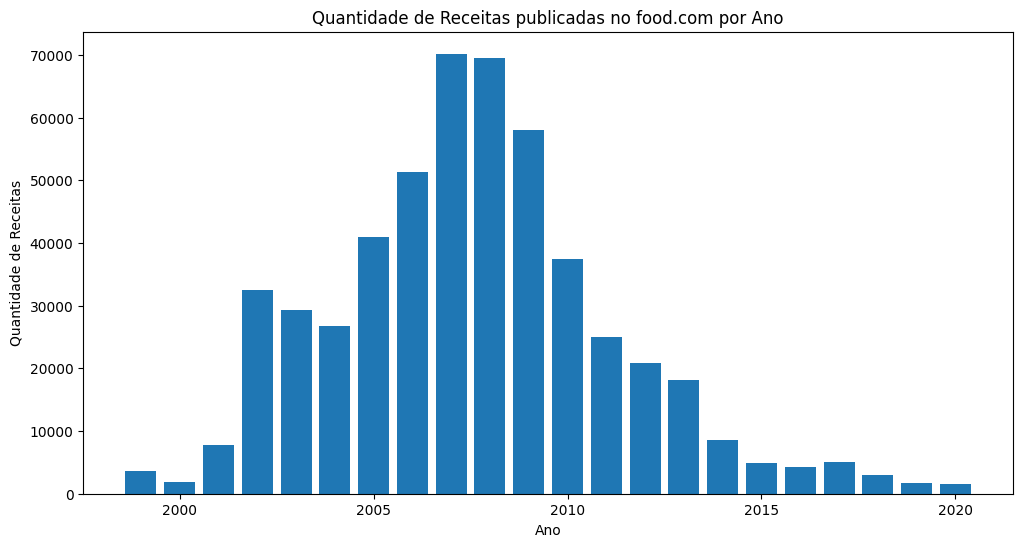

In [41]:
# Conta a quantidade de receitas por ano
df['year'] = df['DatePublished_format'].dt.year
recipes_per_year = df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.bar(recipes_per_year['year'], recipes_per_year['count'])
plt.xlabel('Ano')
plt.ylabel('Quantidade de Receitas')
plt.title('Quantidade de Receitas publicadas no food.com por Ano')
plt.show()

In [46]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours', 'DatePublished_format', 'year',
       'month'],
      dtype='object')

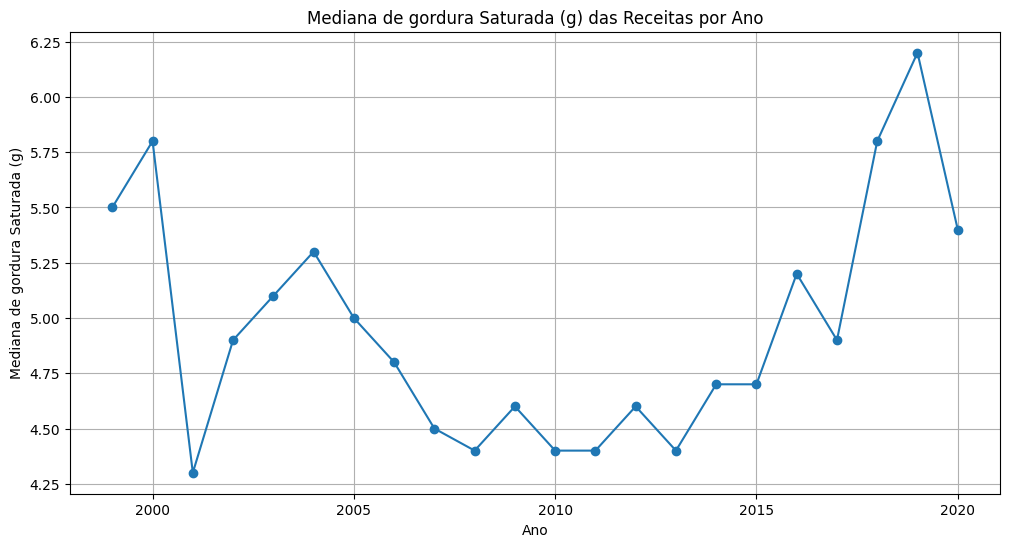

In [56]:
# Média de SaturatedFatContent por ano
df['year'] = df['DatePublished_format'].dt.year
SaturatedFatContent_per_year = df.groupby('year')['SaturatedFatContent'].median().reset_index()

plt.figure(figsize=(12,6))
plt.plot(SaturatedFatContent_per_year['year'], SaturatedFatContent_per_year['SaturatedFatContent'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Mediana de gordura Saturada (g)')
plt.title('Mediana de gordura Saturada (g) das Receitas por Ano')
plt.grid(True)
plt.show()

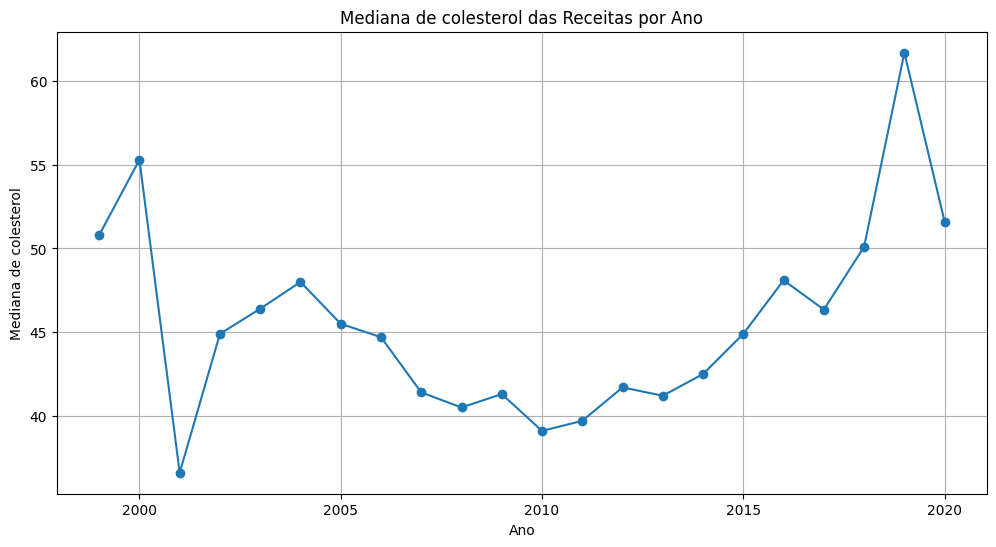

In [54]:
# Média de CholesterolContent por ano
df['year'] = df['DatePublished_format'].dt.year
CholesterolContent_per_year = df.groupby('year')['CholesterolContent'].median().reset_index()

plt.figure(figsize=(12,6))
plt.plot(CholesterolContent_per_year['year'], CholesterolContent_per_year['CholesterolContent'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Mediana de colesterol')
plt.title('Mediana de colesterol das Receitas por Ano')
plt.grid(True)
plt.show()

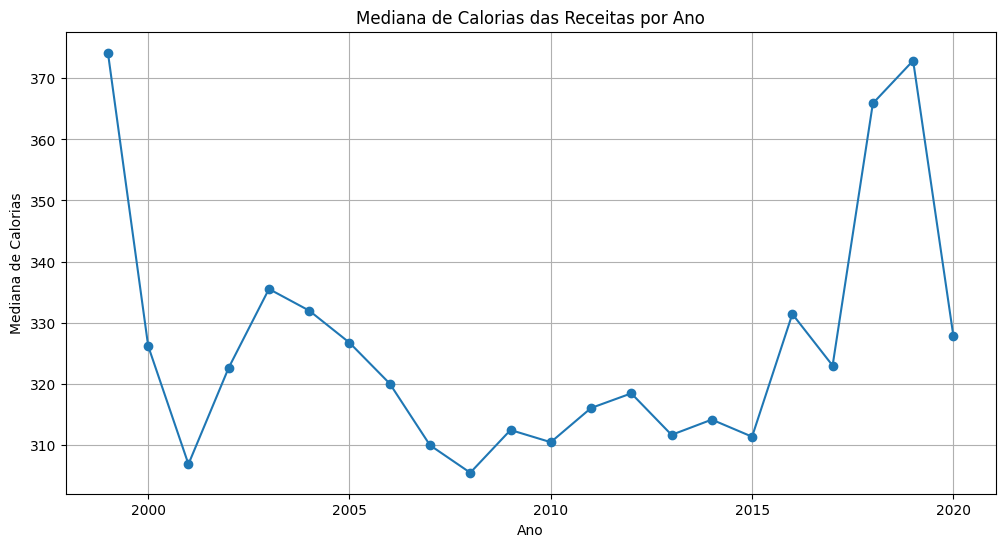

In [52]:
# Média de Calories por ano
df['year'] = df['DatePublished_format'].dt.year
calories_per_year = df.groupby('year')['Calories'].median().reset_index()

plt.figure(figsize=(12,6))
plt.plot(calories_per_year['year'], calories_per_year['Calories'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Mediana de Calorias')
plt.title('Mediana de Calorias das Receitas por Ano')
plt.grid(True)
plt.show()

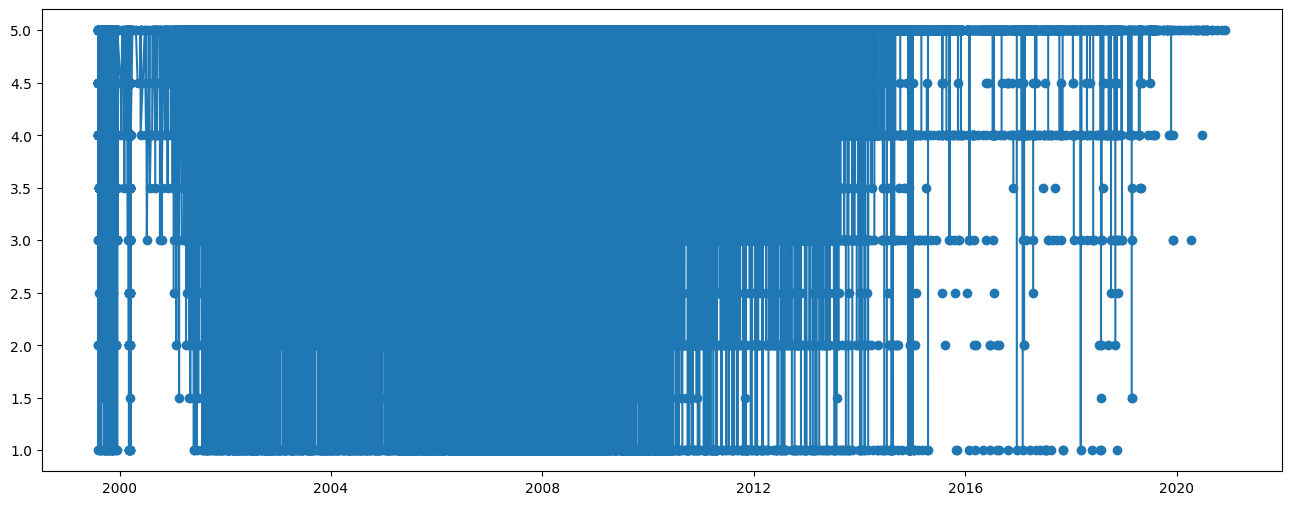

In [39]:
df_sorted = df.sort_values(by='DatePublished_format')

df_temp = df_sorted[df_sorted['SaturatedFatContent']< 5000]

plt.figure(figsize=(16,6))
plt.plot(df_temp['DatePublished_format'], df_temp['AggregatedRating'], marker='o', linestyle='-')

In [8]:
df_temp = df[df['PrepTime_hours']<5]

C:\Users\thais.sousa\AppData\Local\Temp\ipykernel_62584\604646598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CookTime'].fillna(0, inplace = True)


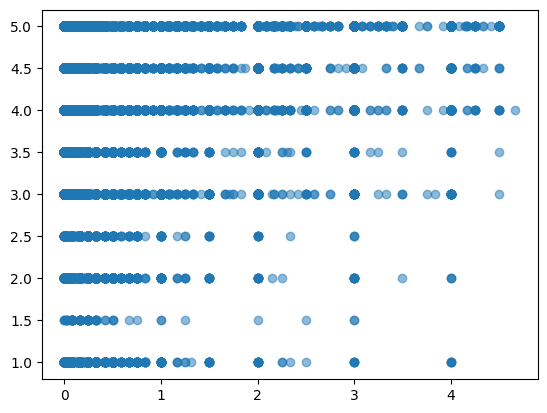

In [13]:
plt.scatter(df_temp['PrepTime_hours'], df_temp['AggregatedRating'], alpha=0.5)

In [39]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours'],
      dtype='object')

In [50]:
df['ProteinContent'].describe()

count    522517.000000
mean         17.469510
std          40.128837
min           0.000000
25%           3.500000
50%           9.100000
75%          25.000000
max       18396.200000
Name: ProteinContent, dtype: float64

In [51]:
df2 = df_temp[df_temp['ProteinContent'] < 100]

 Plotar matriz de correlação para decidir que features fazer scatterplot!

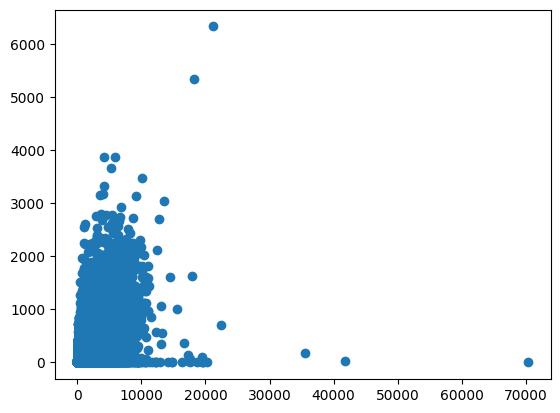

In [62]:
plt.scatter(df2['Calories'], df2['CholesterolContent'])

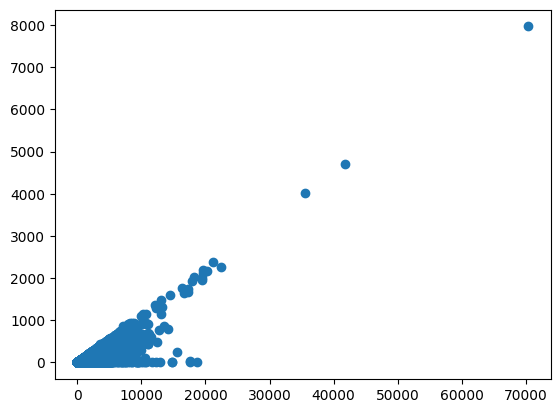

In [63]:
plt.scatter(df2['Calories'], df2['FatContent'])

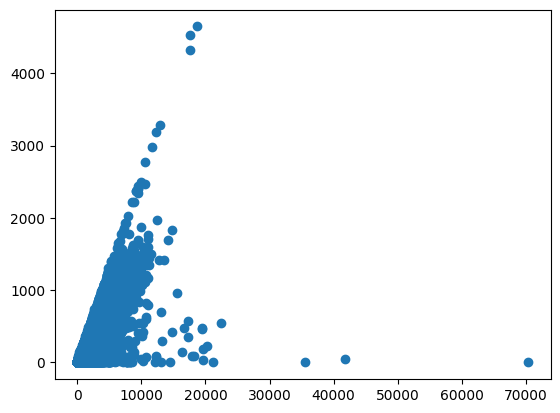

In [64]:
plt.scatter(df2['Calories'], df2['CarbohydrateContent'])

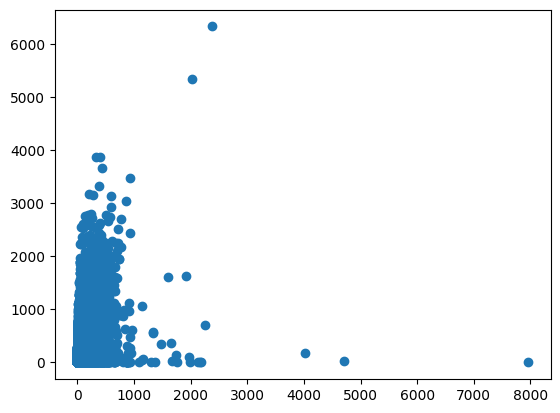

In [68]:
plt.scatter(df2['FatContent'], df2['CholesterolContent'])

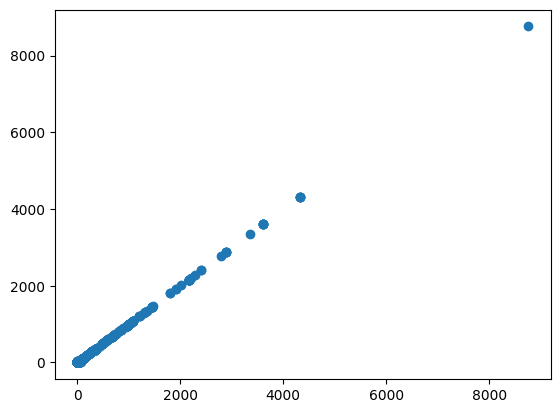

In [66]:
plt.scatter(df2['CookTime_hours'], df2['TotalTime_hours'])

In [19]:
df_dessert = df[df['RecipeCategory']== 'Dessert']

In [23]:
df_vegetable = df[df['RecipeCategory']== 'Vegetable']

In [24]:
df_vegetable.shape

(27231, 31)

In [14]:
df['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Pie', 'Chicken', 'Dessert', 'Southwestern U.S.',
       'Sauces', 'Stew', 'Black Beans', '< 60 Mins', 'Lactose Free',
       'Weeknight', 'Yeast Breads', 'Whole Chicken', 'High Protein',
       'Cheesecake', 'Free Of...', 'High In...', 'Brazilian', 'Breakfast',
       'Breads', 'Bar Cookie', 'Brown Rice', 'Oranges', 'Pork',
       'Low Protein', 'Asian', 'Potato', 'Cheese', 'Halibut', 'Meat',
       'Lamb/Sheep', 'Very Low Carbs', 'Spaghetti', 'Scones',
       'Drop Cookies', 'Lunch/Snacks', 'Beans', 'Punch Beverage',
       'Pineapple', 'Low Cholesterol', '< 30 Mins', 'Quick Breads',
       'Sourdough Breads', 'Curries', 'Chicken Livers', 'Coconut',
       'Savory Pies', 'Poultry', 'Steak', 'Healthy', 'Lobster', 'Rice',
       'Apple', 'Broil/Grill', 'Spreads', 'Crab', 'Jellies', 'Pears',
       'Chowders', 'Cauliflower', 'Candy', 'Chutneys', 'White Rice',
       'Tex Mex', 'Bass', 'German', 'Fru

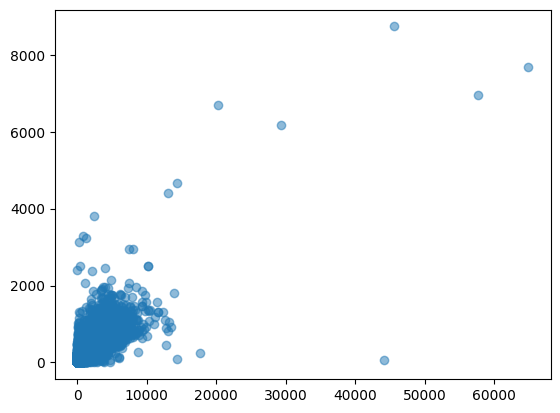

In [22]:
plt.scatter(df_dessert['SodiumContent'],df_dessert['CarbohydrateContent'], alpha=0.5)

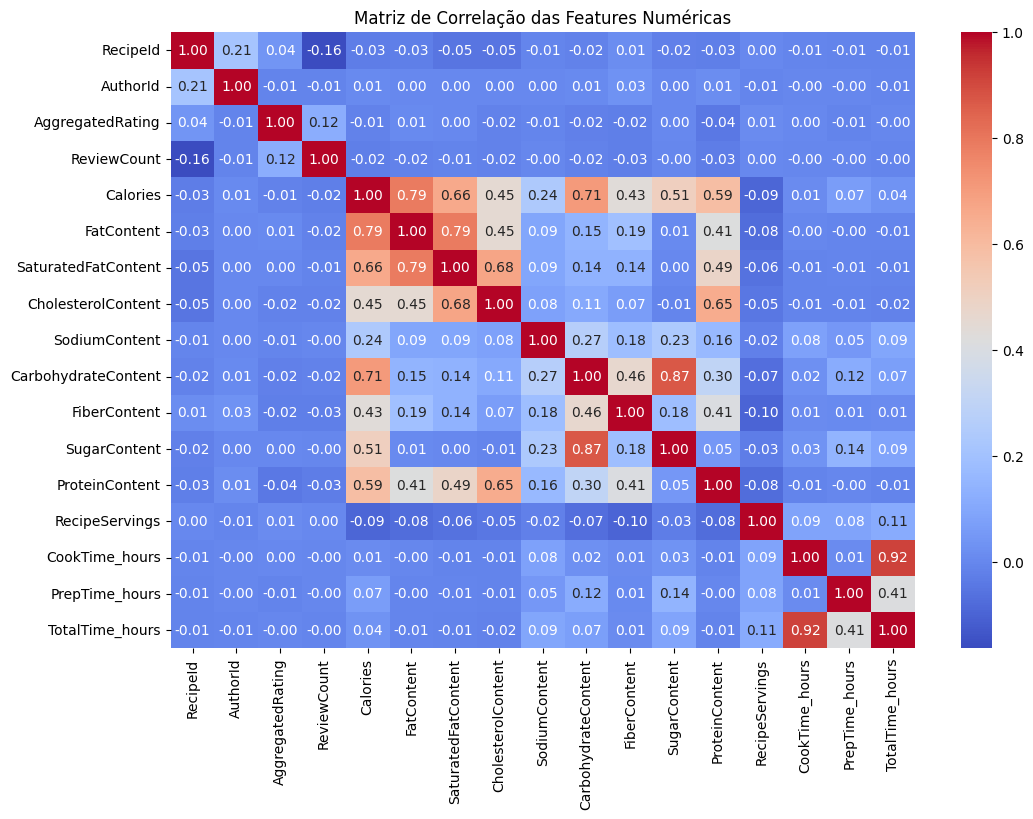

In [25]:
# Seleciona apenas as colunas numéricas
numeric_df = df_vegetable.select_dtypes(include=['number'])

# Calcula a matriz de correlação
corr = numeric_df.corr()

# Plota o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

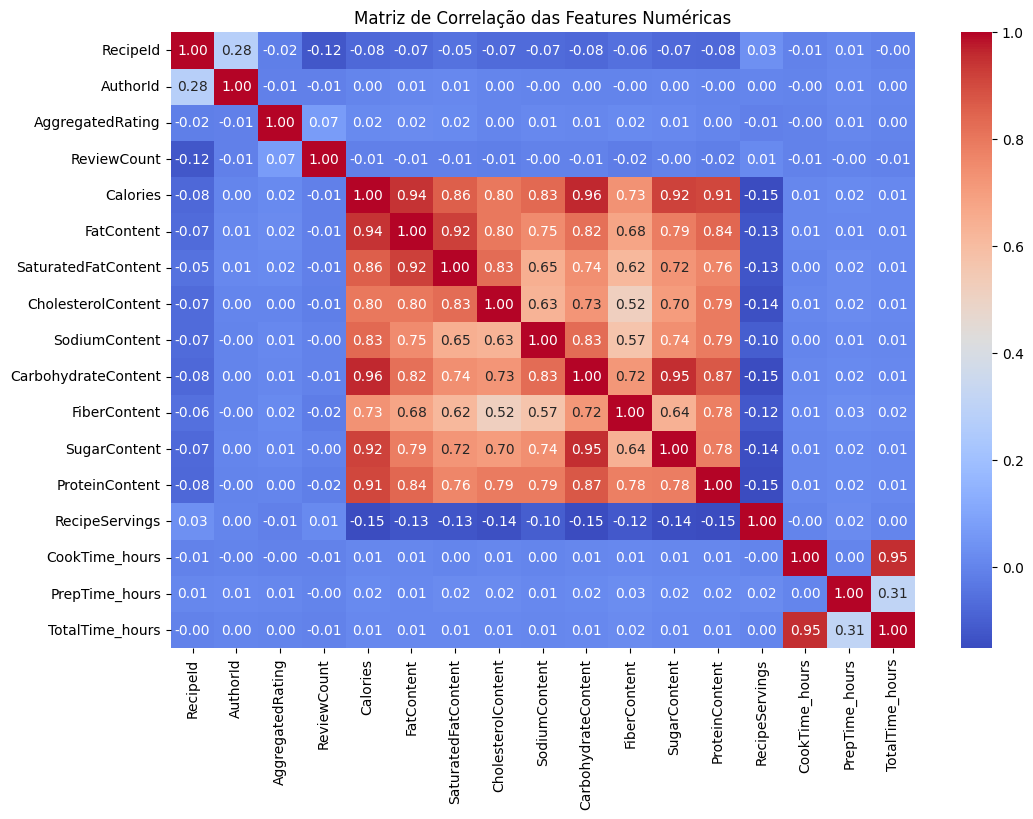

In [20]:
# Seleciona apenas as colunas numéricas
numeric_df = df_dessert.select_dtypes(include=['number'])

# Calcula a matriz de correlação
corr = numeric_df.corr()

# Plota o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

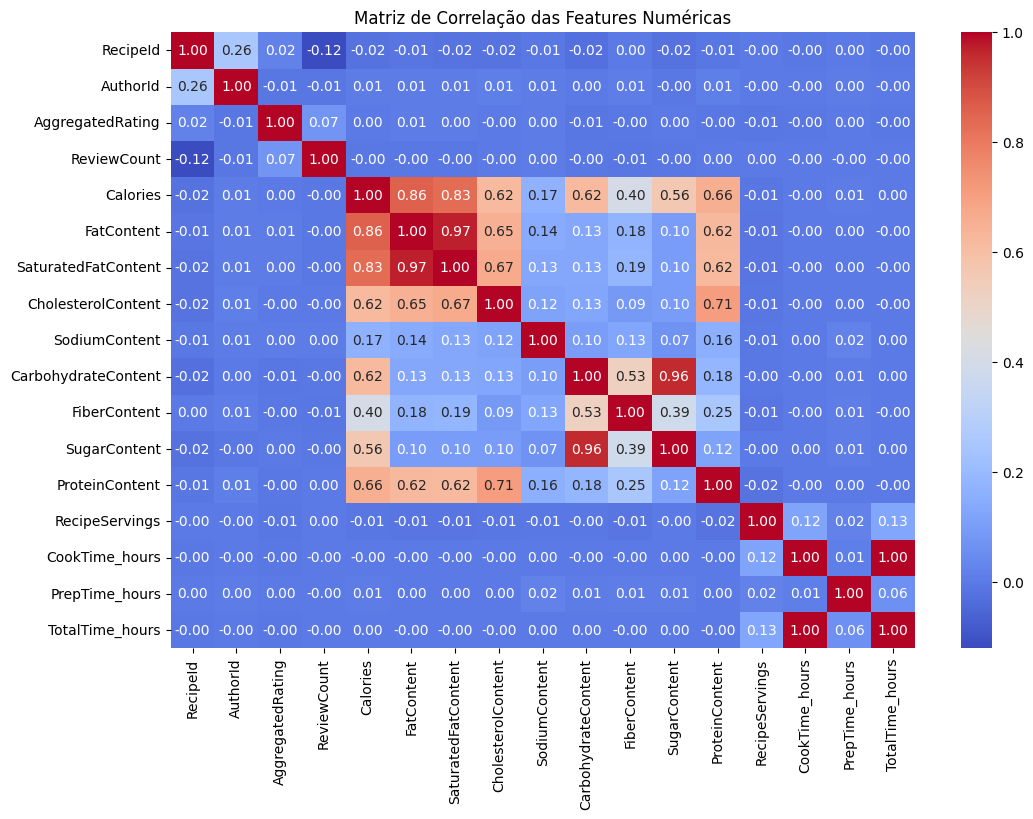

In [65]:
# Seleciona apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcula a matriz de correlação
corr = numeric_df.corr()

# Plota o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

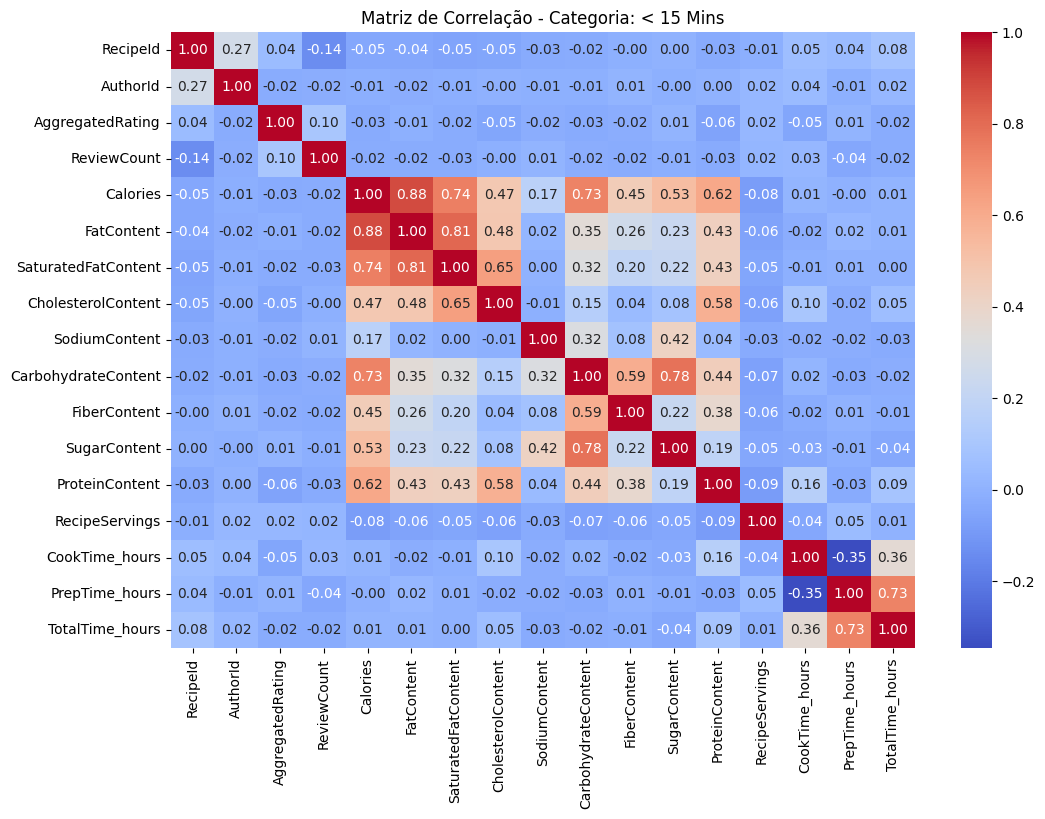

In [26]:
def plot_category_correlation_heatmap(category):
    """
    Plota o heatmap da matriz de correlação das features numéricas para uma categoria de receita específica.
    Parâmetros:
        category (str): Nome da categoria (ex: 'Dessert', 'Vegetable')
    """
    df_cat = df[df['RecipeCategory'] == category]
    numeric_df = df_cat.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Matriz de Correlação - Categoria: {category}')
    plt.show()

# Exemplo de uso:
plot_category_correlation_heatmap('< 15 Mins')

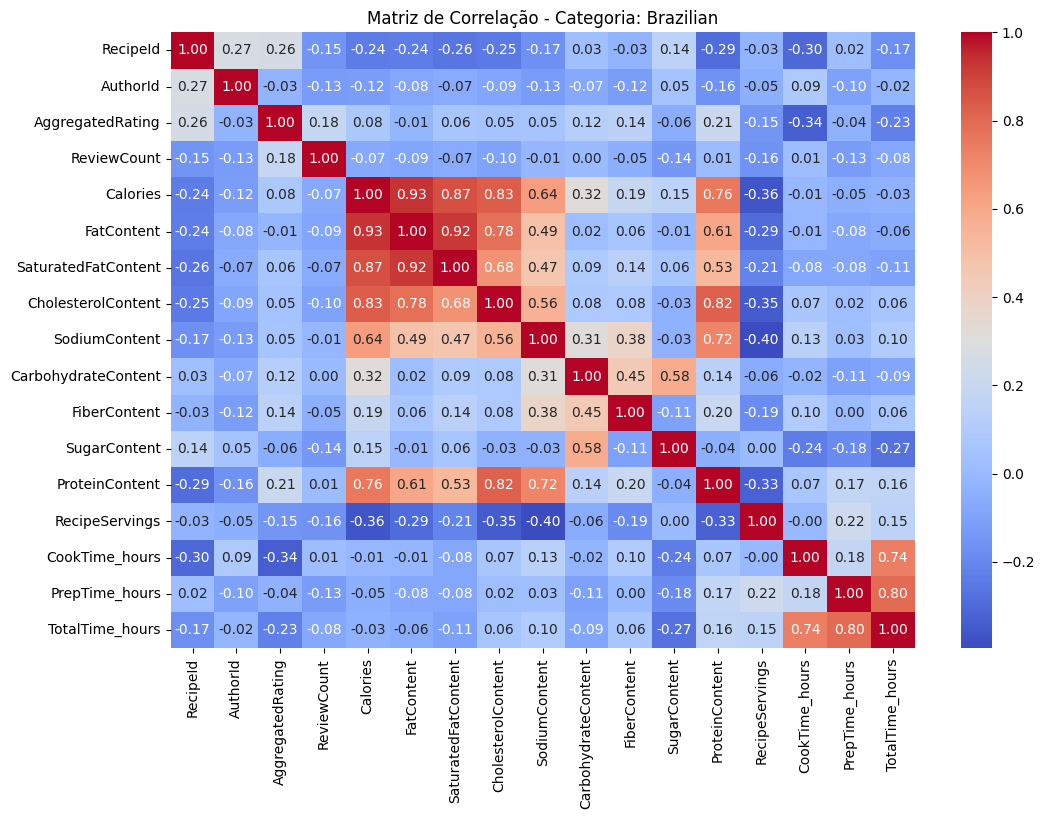

In [27]:
plot_category_correlation_heatmap('Brazilian')